In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sb.set()

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,id,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [3]:
df.describe()

,id,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [4]:
df.cut_quality.value_counts()

Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64

In [5]:
df = df.query('cut_quality != "unknown" & cut_quality != "Ideal"')

# Set Total Sales Price within 2 standard deviations

In [6]:
print(df.total_sales_price.quantile(0.025))
print(df.total_sales_price.quantile(0.975))

556.0
29450.649999999994


In [7]:
df = df.query('total_sales_price <= 29451')
df = df.query('meas_length > 0 & meas_width > 0 & meas_depth > 0')
df.describe()

,id,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,153742.000000,153742.000000,153742.000000,153742.000000,153742.000000,153742.000000,153742.000000,153742.000000
mean,95203.937629,0.553419,61.064725,56.724369,5.025038,5.051139,3.180462,3246.189779
std,58781.478672,0.395218,8.028881,8.280039,1.026597,1.043769,1.897604,4460.818925
min,0.000000,0.080000,0.000000,0.000000,0.050000,2.800000,0.800000,200.000000
25%,45473.250000,0.300000,61.200000,56.000000,4.290000,4.320000,2.680000,902.000000
50%,88889.500000,0.400000,62.300000,58.000000,4.690000,4.720000,2.940000,1328.000000
75%,141782.750000,0.630000,62.800000,59.000000,5.470000,5.500000,3.410000,3423.750000
max,211707.000000,5.670000,83.200000,94.000000,57.500000,62.300000,64.500000,29451.000000


# Total Sales Price Plot

- 3/4 of the diamonds' total sales price is below $3423.75

<AxesSubplot:xlabel='total_sales_price'>

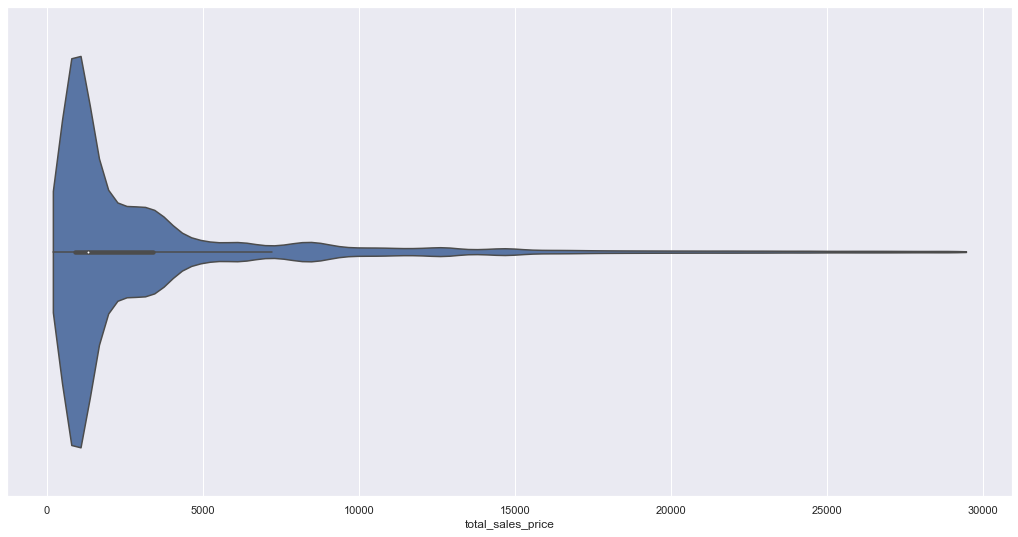

In [8]:
f, axes = plt.subplots(1, 1, figsize=(18, 9))

sb.violinplot(x=df.total_sales_price, orient='h', cut=0)

# Measured Volume

Multiplying measured length, measured width & measured depth together gives us a rough estimate of the measured volume of the diamonds.

In [9]:
df.insert(1, 'meas_volume', df.meas_length * df.meas_width * df.meas_depth, 2)
df.head()

,id,meas_volume,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,14.641305,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,14.609528,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,14.783040,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,14.661504,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,14.370174,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


# Set measured volume within 3 standard deviations

In [10]:
print(df.meas_volume.quantile(0.995))
df = df.query('meas_volume <= 371.5')

371.48880463500006


In [11]:
df.describe()

,id,meas_volume,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,152974.000000,152974.000000,152974.000000,152974.000000,152974.000000,152974.000000,152974.000000,152974.000000,152974.000000
mean,94701.990273,88.001061,0.544306,61.062182,56.718389,5.007560,5.033232,3.116286,3165.680442
std,58458.037170,59.181147,0.369505,8.038722,8.294731,0.984674,0.971719,0.606689,4285.781541
min,0.000000,1.618160,0.080000,0.000000,0.000000,0.050000,2.800000,0.800000,200.000000
25%,45242.500000,49.273770,0.300000,61.200000,56.000000,4.290000,4.320000,2.680000,900.000000
50%,88402.000000,64.722528,0.400000,62.300000,58.000000,4.680000,4.710000,2.940000,1320.000000
75%,141037.750000,100.650600,0.620000,62.800000,59.000000,5.450000,5.470000,3.390000,3396.000000
max,211706.000000,371.494200,3.310000,83.200000,94.000000,13.360000,9.950000,6.860000,29451.000000


# Measured Volume Plot

<AxesSubplot:xlabel='meas_volume'>

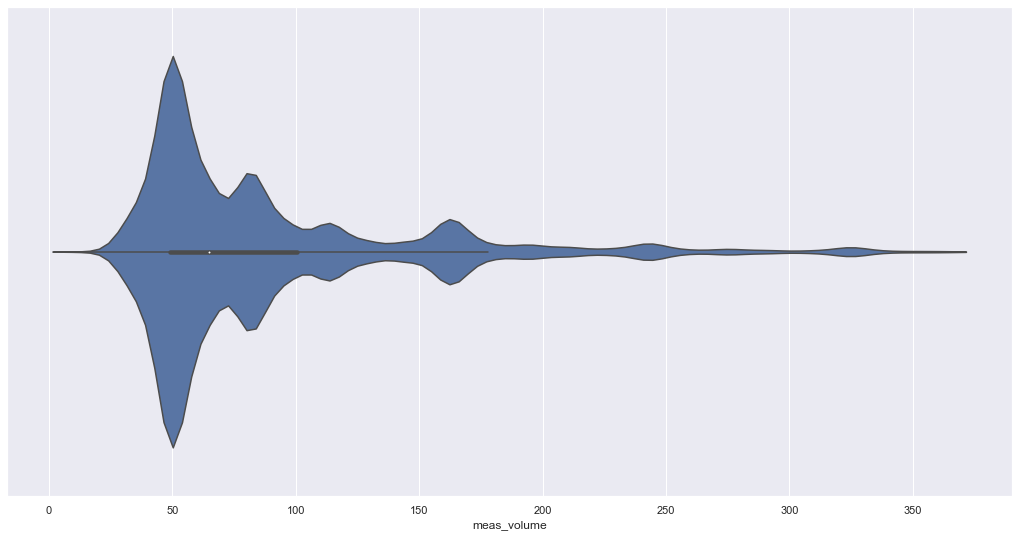

In [12]:
f, axes = plt.subplots(1, 1, figsize=(18, 9))

sb.violinplot(x=df.meas_volume, orient='h', cut=0)

# Predict Diamond Price using Measured Volume

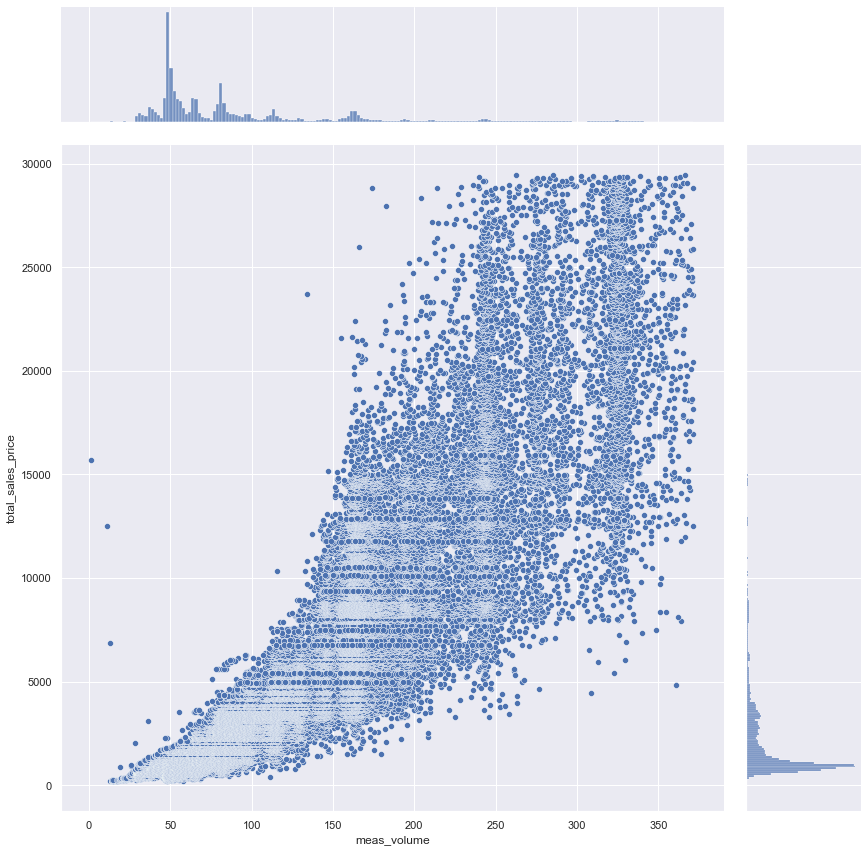

In [13]:
df_concat = pd.concat([df.meas_volume, df.total_sales_price], axis = 1).reindex(df.meas_volume.index)

sb.jointplot(data = df_concat, x = "meas_volume", y = "total_sales_price", height = 12)

<AxesSubplot:>

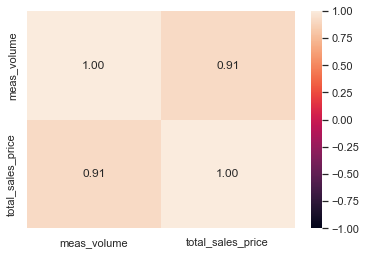

In [14]:
sb.heatmap(df_concat.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [15]:
# Extract Response and Predictors
X = pd.DataFrame(df['meas_volume'])
Y = pd.DataFrame(df['total_sales_price'])

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (114730, 1) (114730, 1)
Test Set  : (38244, 1) (38244, 1)


In [16]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [-2642.71243716]
Coefficients 	: a =  [[65.99701643]]


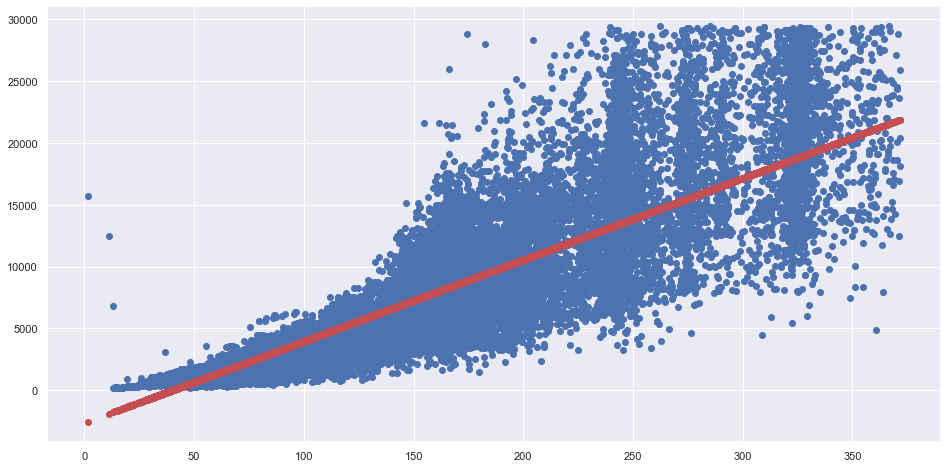

In [17]:
# Predict Total values corresponding to meas_volume
Y_train_predict = lr.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.scatter(X_train, Y_train_predict, color = "r")
plt.show()

In [18]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", lr.score(X_train, Y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(Y_train, Y_train_predict)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.830482651451127
Mean Squared Error (MSE) 	: 3126243.58409347
Root Mean Squared Error (RMSE) 	: 1768.1186566781853


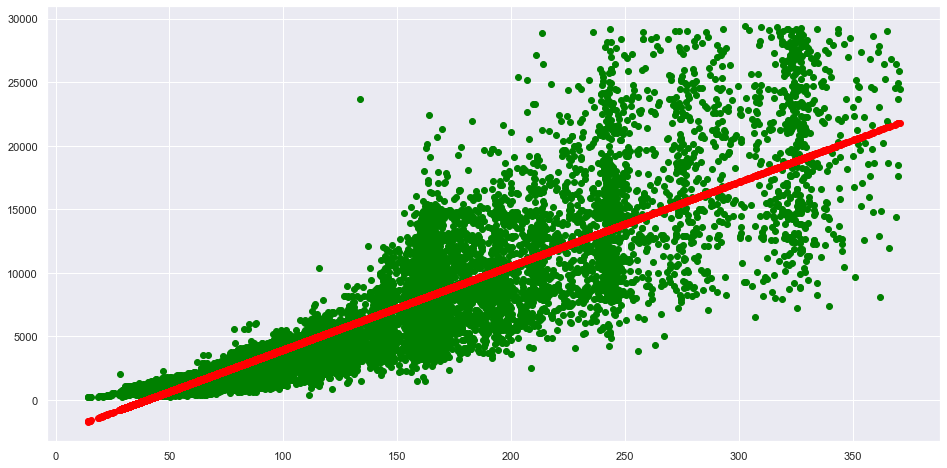

In [19]:
# Predict Total values corresponding to meas_volume test
Y_test_predict = lr.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_predict, color = "red")
plt.show()

In [20]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", lr.score(X_test, Y_test))

mse = mean_sq_err(Y_test, Y_test_predict)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.82838452111118
Mean Squared Error (MSE) 	: 3113949.6423299555
Root Mean Squared Error (RMSE) 	: 1764.6386718900715


# Predicting Diamond price using Carat Weight

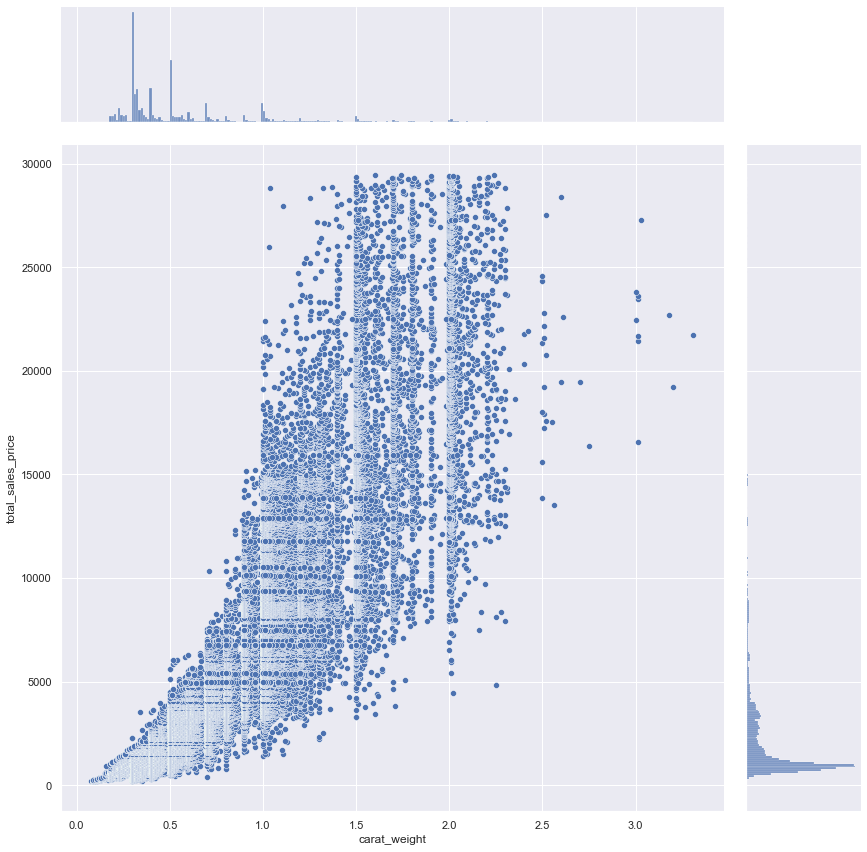

In [21]:
df_concat = pd.concat([df.carat_weight, df.total_sales_price], axis = 1).reindex(df.carat_weight.index)

sb.jointplot(data = df_concat, x = "carat_weight", y = "total_sales_price", height = 12)

<AxesSubplot:>

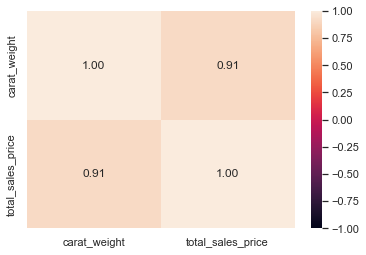

In [22]:
sb.heatmap(df_concat.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [23]:
# Extract Response and Predictors
X = pd.DataFrame(df['carat_weight'])
Y = pd.DataFrame(df['total_sales_price'])

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (114730, 1) (114730, 1)
Test Set  : (38244, 1) (38244, 1)


In [24]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [-2566.29527012]
Coefficients 	: a =  [[10524.24773432]]


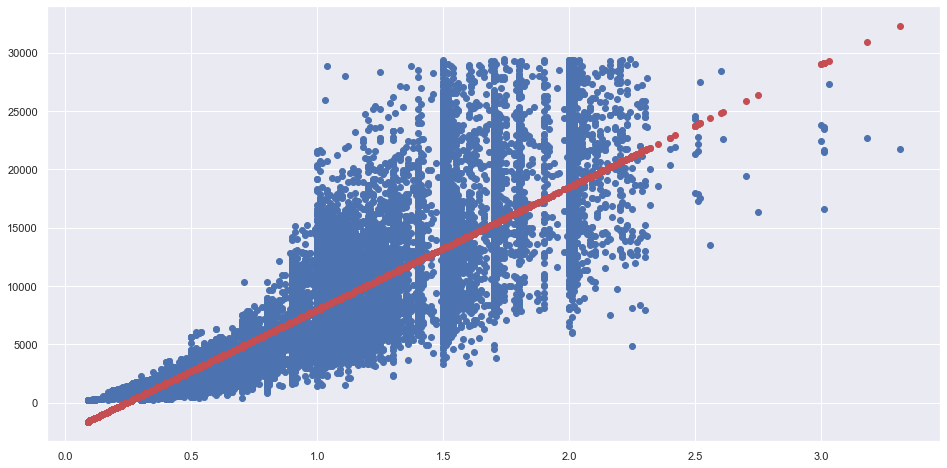

In [25]:
# Predict Total values corresponding to meas_volume
Y_train_predict = lr.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, Y_train)
plt.scatter(X_train, Y_train_predict, color = "r")
plt.show()

In [26]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", lr.score(X_train, Y_train))

mse = mean_sq_err(Y_train, Y_train_predict)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.8254879602254406
Mean Squared Error (MSE) 	: 3188624.9712976455
Root Mean Squared Error (RMSE) 	: 1785.6721343229965


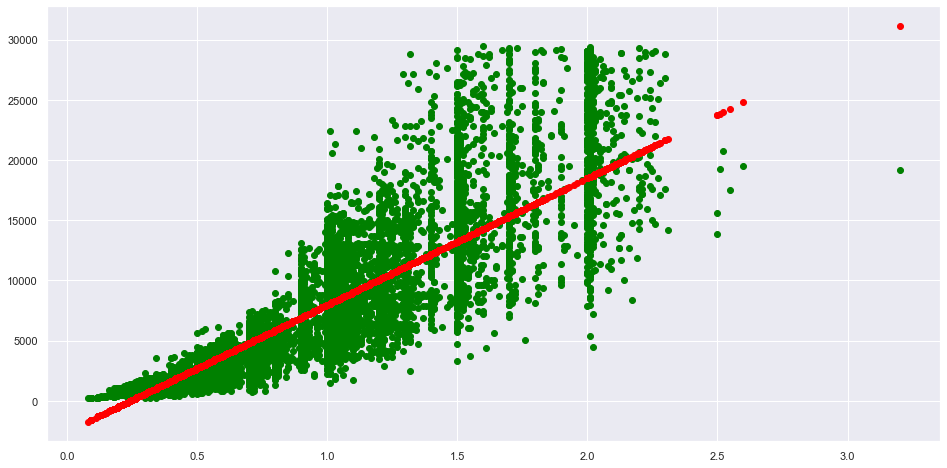

In [27]:
# Predict Total values corresponding to meas_volume test
Y_test_predict = lr.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, color = "green")
plt.scatter(X_test, Y_test_predict, color = "red")
plt.show()

In [28]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", lr.score(X_test, Y_test))

mse = mean_sq_err(Y_test, Y_test_predict)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.8290057656219705
Mean Squared Error (MSE) 	: 3190105.361908418
Root Mean Squared Error (RMSE) 	: 1786.086605377359
